In [1]:
from __future__ import print_function
from IPython.display import display, clear_output
from datetime import datetime, timedelta
from itertools import product
from pandas.plotting import register_matplotlib_converters

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random
import tensorflow as tf


pd.options.display.max_columns = None
register_matplotlib_converters()


%matplotlib inline

In [2]:
%pip install h3

# May need to restart kernel if installed for the first time
from h3 import h3

bounding_box = ([30.727818,104.043333],[30.726490,104.129076],[30.655191,104.129591],[30.652828,104.042102])
for lat, lng in bounding_box:
    h3_address = h3.geo_to_h3(lat, lng, 8)
    hex_center_coordinates = h3.h3_to_geo(h3_address) # array of [lat, lng]
    hex_boundary = h3.h3_to_geo_boundary(h3_address) # array of arrays of [lat, lng]

Looking in indexes: https://pypi.org/simple, https://pypi.lyft.net/pypi/
Note: you may need to restart the kernel to use updated packages.


In [3]:
bounding_box = ([30.727818,104.043333],[30.726490,104.129076],[30.655191,104.129591],[30.652828,104.042102])

In [4]:
import csv

coords = []
ids = []

lats = 0
with open('data/hexagon_grid_table.csv', 'r') as csvfile:
    for row in csv.reader(csvfile):
        if len(row) != 13:
            continue
        ids.append(row[0])        
        lng = sum([float(row[i]) for i in range(1, 13, 2)]) / 6
        lat = sum([float(row[i]) for i in range(2, 13, 2)]) / 6
        coords.append((lat, lng))
        lats += lat


In [5]:
from scipy.spatial import KDTree

tree = KDTree(coords)
_, i = tree.query((30.71, 104.50))
print('5973d1e3fdf1f878', ids[i])
_, i = tree.query((30.40, 103.99))
print('27471aff3df268a1', ids[i])
_, i = tree.query((30.37, 104.52))
print('15948343c6223064', ids[i])


_, i = tree.query((30.655191,104.129591))
print(ids[i], coords[i])
_, i = tree.query((30.727818,104.043333))
print(ids[i], coords[i])
_, i = tree.query((30.726490,104.129076))
print(ids[i], coords[i])

5973d1e3fdf1f878 5973d1e3fdf1f878
27471aff3df268a1 27471aff3df268a1
15948343c6223064 15948343c6223064
386c78bc3c226d88 (30.65924666666667, 104.12614)
926d27c14e84f5d0 (30.73054666666667, 104.04442)
111297464a0c9cc8 (30.725296666666665, 104.13031000000001)


In [6]:
cancel_rates = [0] * 10
total_rows = 0
for date in range(1,31):
    with open(f'data/total_order_cancellation_probability/order_201611{date:02d}_cancel_prob', 'r') as csvfile:
        for row in csv.reader(csvfile):
            assert len(row) == 11
            for i in range(1, len(row)):
                cancel_rates[i - 1] += float(row[i])
            total_rows += 1

y = [r / total_rows for r in cancel_rates]            
y          

[0.03493870431607338,
 0.03866776293519174,
 0.041760728528424544,
 0.05007157148698522,
 0.059208628863229744,
 0.07455933064560377,
 0.08571890195014424,
 0.09848048263719175,
 0.11230701971967454,
 0.12717324794320947]

fit [ 5.04970371e-02  6.39626539e-04 -3.83965901e+02 -1.30398096e-02]


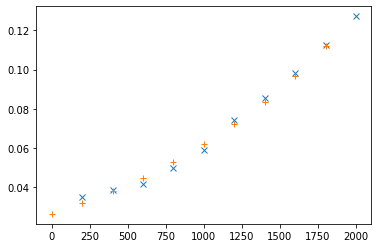

In [7]:
import scipy
import itertools

x = list(range(200, 2001, 200))
y = [r / total_rows for r in cancel_rates]
fit, _ = scipy.optimize.curve_fit(lambda t,a,b,c,d: a*np.exp(b*(t+c))+d,  x,  y,  p0=(0.1, 0.01, 0, -0.02))
print('fit', fit)
plt.plot(x, y, 'x')
#print(func(200, fit[0], fit[1]))
x_extended = list(range(0, 2000, 200))
plt.plot(x_extended, [fit[0] * np.exp(fit[1] * (a + fit[2])) + fit[3] for a in x_extended], '+')
         

In [8]:
with open('data/idle_transition_probability', 'r') as csvfile:
    for row in csv.reader(csvfile):
        print(row)
        break

['0', '8bc6f140185f6d4d', '8bc6f140185f6d4d', '1.0']


In [9]:
import time

time.gmtime(148865000).tm_hour

23

In [148]:
# dql: {true, false}
dql = random.random() < 0.5
# alpha: [0.0001, 0.1] (log)
alpha = 10 ** -(3 * random.random() + 1)
# gamma: [0.99, 0.99999] (log)
gamma = 1 - 10 ** -(3 * random.random() + 2)
# idle reward: [-1e-2, 0] (linear)
idle_reward = -1e-2 * random.random()

f'dql={dql}, alpha={alpha:.4f}, gamma={gamma:.6f}, idle_reward={idle_reward:.3f}'

'dql=False, alpha=0.0584, gamma=0.996014, idle_reward=-0.009'